This topic is on how to split the test data for train and validation
Also how to get the best value of K in KNN


In [1]:
#standard steps to import the iris data
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

print x.shape
print y.shape


(150L, 4L)
(150L,)


In [11]:
#to import the accuracy score 

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x,y)

# store the predicted response values
y_pred = logreg.predict(x)

# check how many predictions were generated
print len(y_pred)

print accuracy_score(y,y_pred)

150
0.96


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)
y_pred = knn.predict(x)
print(accuracy_score(y, y_pred))

0.966666666667


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
y_pred = knn.predict(x)
print(accuracy_score(y, y_pred))

1.0


In [41]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

print x_train.shape
print y_train.shape

print x_test.shape
print y_test.shape

(90L, 4L)
(90L,)
(60L, 4L)
(60L,)


In [42]:
logreg1 = LogisticRegression(C=0.9)
print logreg1
logreg1.fit(x_train,y_train)

y_pred =logreg1.predict(x_test)

print accuracy_score(y_test,y_pred)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9


In [43]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(x_train, y_train)
y_pred = knn2.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.933333333333


In [51]:
knn3 = KNeighborsClassifier(n_neighbors=18)
knn3.fit(x_train, y_train)
y_pred = knn3.predict(x_test)
print(accuracy_score(y_test, y_pred))

1.0


In [52]:
k_range = range(1,50)
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    
    scores.append(accuracy_score(y_test,y_pred))
    
print scores

[0.93333333333333335, 0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.93333333333333335, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667, 1.0, 0.98333333333333328, 1.0, 0.98333333333333328, 0.98333333333333328, 0.96666666666666667, 0.96666666666666667, 0.98333333333333328, 1.0, 0.96666666666666667, 0.96666666666666667, 0.98333333333333328, 0.94999999999999996, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.94999999999999996, 0.94999999999999996, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.93333333333333335, 0.94999999999999996, 0.91666666666666663, 0.91666666666666663, 0.91666666666666663]


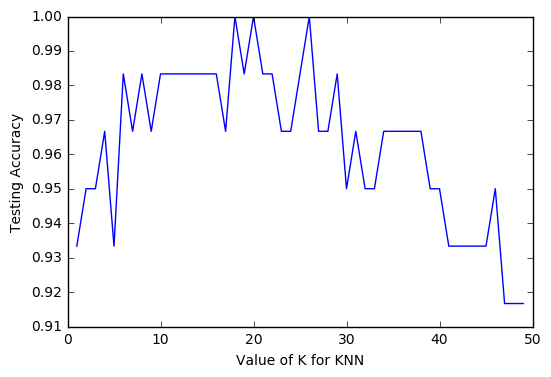

In [53]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')